In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/Users/mahimaadvilkar/Downloads/DC-ClusteredData.csv')
df.head()

,ENERGY,AREA,IT EQUIPMENT POWER,PUE,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,CAGES,SUITES,BUILD_TO_SUIT,FOOTPRINTS,REMOTE_HANDS,YEAR_OPERATIONAL,INTERNET_EXCHANGE_POINTS,Cluster,PCA1,PCA2
0,1.3,10200,0.91,1.428571,True,True,True,True,True,True,True,True,1925,1.000,0,-2.254150,-0.459857
1,9.2,15795,6.44,1.428571,True,True,True,True,True,True,True,True,2001,1.625,0,-1.806325,0.080941
2,10.0,5000,7.00,1.428571,True,True,True,True,True,True,True,True,1925,1.625,0,-2.136445,-0.485577
3,3.0,32000,2.10,1.428571,True,True,True,True,True,True,True,True,2006,1.625,0,-1.880177,-0.092049
4,7.0,130000,4.90,1.428571,True,True,True,True,True,False,True,True,1984,1.000,0,-1.099621,0.459555


In [3]:
df.info()
df.describe()
df.isnull().sum()
df['Cluster'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENERGY                    39 non-null     float64
 1   AREA                      39 non-null     int64  
 2   IT EQUIPMENT POWER        39 non-null     float64
 3   PUE                       39 non-null     float64
 4   FULL_CABINETS             39 non-null     bool   
 5   PARTIAL_CABINETS          39 non-null     bool   
 6   SHARED_RACKSPACE          39 non-null     bool   
 7   CAGES                     39 non-null     bool   
 8   SUITES                    39 non-null     bool   
 9   BUILD_TO_SUIT             39 non-null     bool   
 10  FOOTPRINTS                39 non-null     bool   
 11  REMOTE_HANDS              39 non-null     bool   
 12  YEAR_OPERATIONAL          39 non-null     int64  
 13  INTERNET_EXCHANGE_POINTS  39 non-null     float64
 14  Cluster     

0    29
1     8
2     2
Name: Cluster, dtype: int64

In [ ]:
#Cluster Distribution

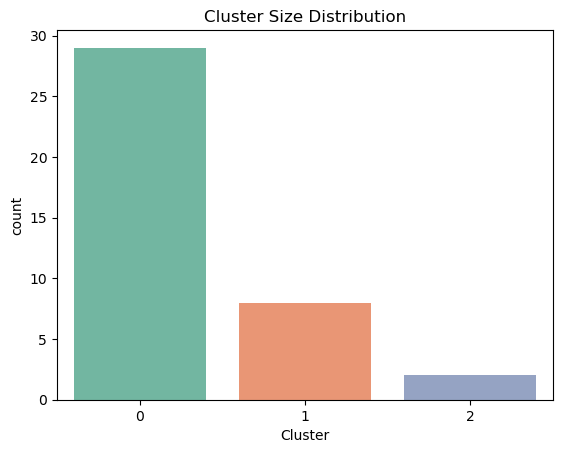

In [4]:
# Cluster counts
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Cluster Size Distribution')
plt.show()


In [ ]:
#PCA Scatter Plot (Visualize Cluster Separation)

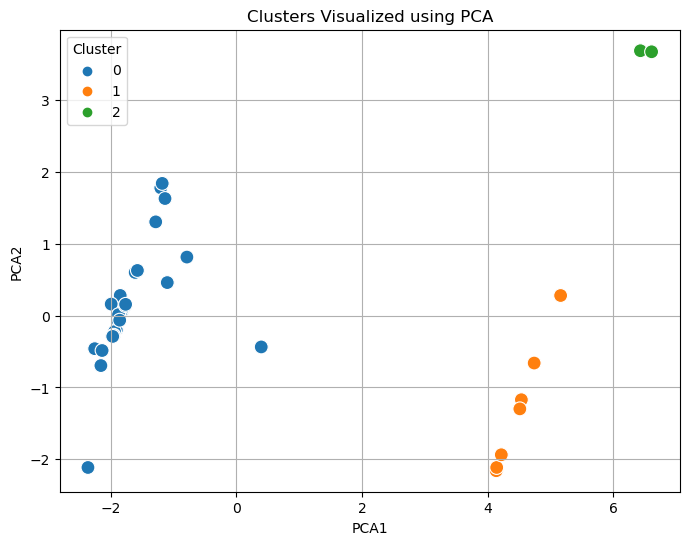

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Clusters Visualized using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
#Feature Distribution Across Clusters (Boxplots)

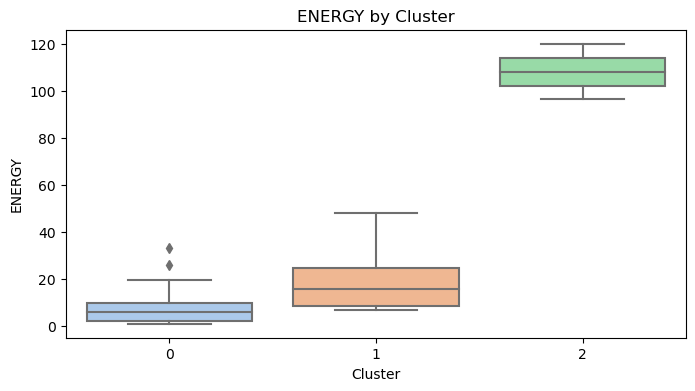

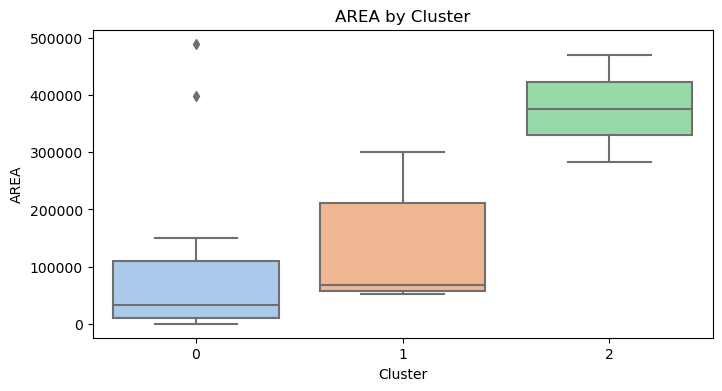

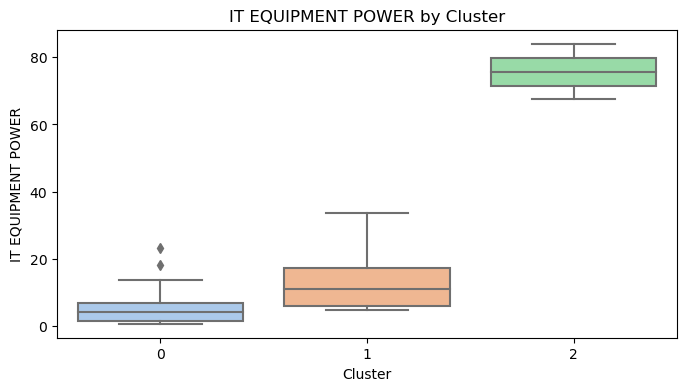

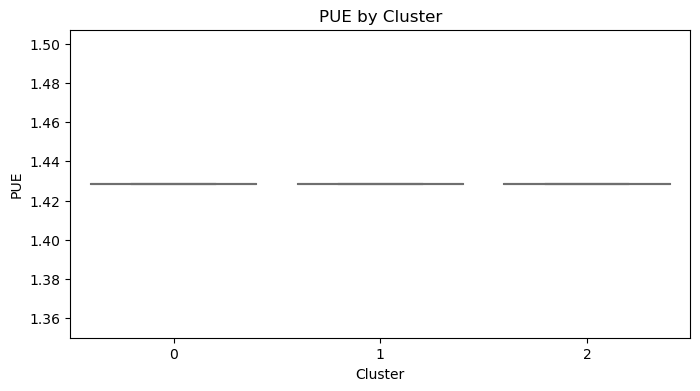

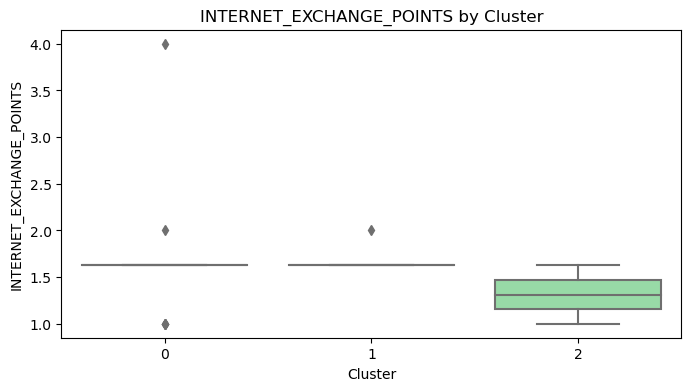

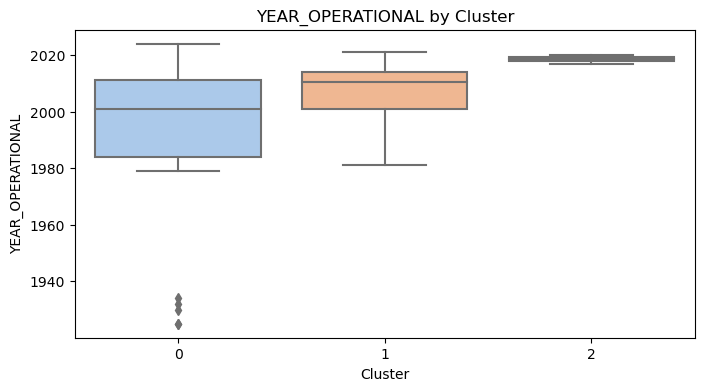

In [6]:
numeric_cols = ['ENERGY', 'AREA', 'IT EQUIPMENT POWER', 'PUE', 'INTERNET_EXCHANGE_POINTS', 'YEAR_OPERATIONAL']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Cluster')
    plt.show()


In [ ]:
# Heatmap of Cluster-wise Means (📊 Summary View)

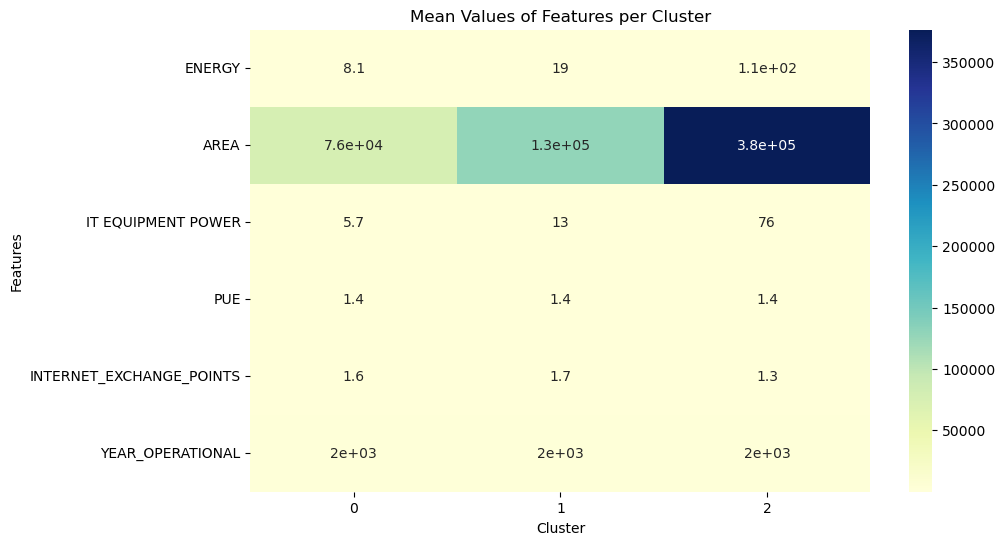

In [7]:
cluster_means = df.groupby('Cluster')[numeric_cols].mean().round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='YlGnBu')
plt.title('Mean Values of Features per Cluster')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.show()


In [ ]:
#Boolean Feature Distribution per Cluster

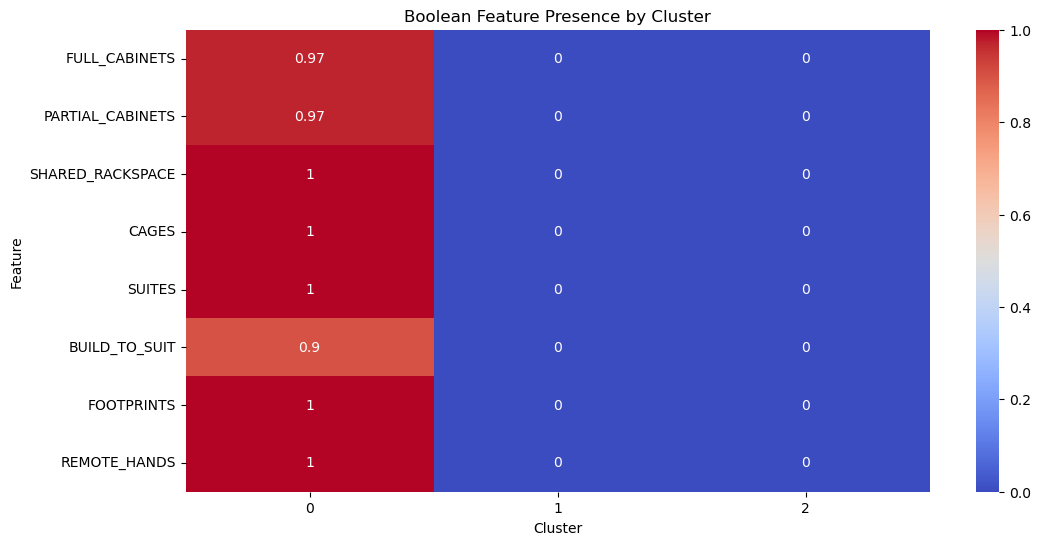

In [8]:
bool_cols = ['FULL_CABINETS', 'PARTIAL_CABINETS', 'SHARED_RACKSPACE', 'CAGES', 'SUITES', 'BUILD_TO_SUIT', 'FOOTPRINTS', 'REMOTE_HANDS']

bool_summary = df.groupby('Cluster')[bool_cols].sum()

# Normalize if you want percentage presence
bool_percentage = bool_summary.div(df['Cluster'].value_counts(), axis=0).round(2)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(bool_percentage.T, annot=True, cmap='coolwarm')
plt.title('Boolean Feature Presence by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


In [ ]:
#Pairplot (if you want deeper pairwise understanding)

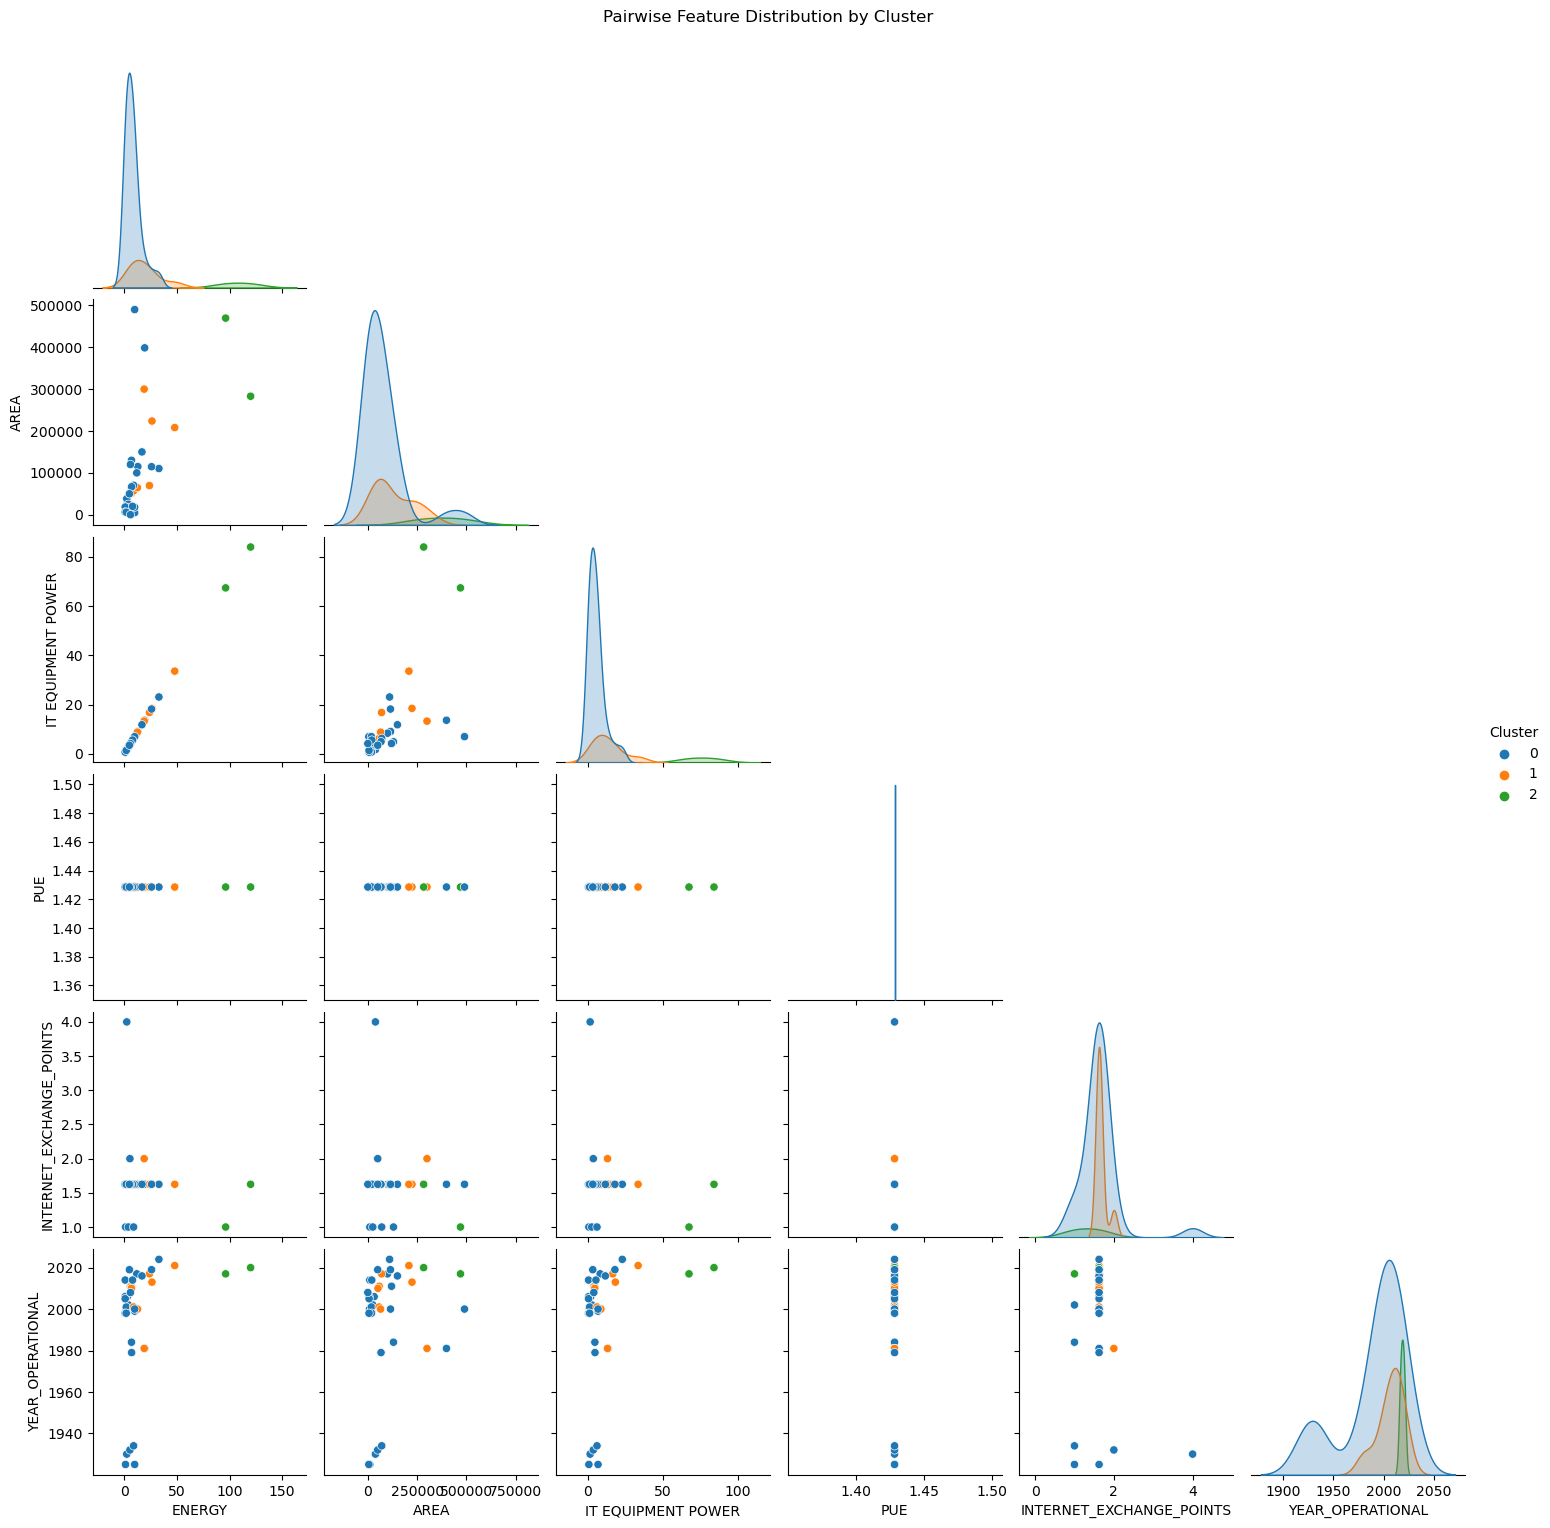

In [9]:
sns.pairplot(df[numeric_cols + ['Cluster']], hue='Cluster', palette='tab10', corner=True)
plt.suptitle('Pairwise Feature Distribution by Cluster', y=1.02)
plt.show()


In [ ]:
#Cluster Insights Table (Quantitative Summary)

In [10]:
cluster_summary = df.groupby('Cluster')[numeric_cols + bool_cols].mean().round(2)
display(cluster_summary)


,ENERGY,AREA,IT EQUIPMENT POWER,PUE,INTERNET_EXCHANGE_POINTS,YEAR_OPERATIONAL,FULL_CABINETS,PARTIAL_CABINETS,SHARED_RACKSPACE,CAGES,SUITES,BUILD_TO_SUIT,FOOTPRINTS,REMOTE_HANDS
Cluster,,,,,,,,,,,,,,
0,8.07,75987.48,5.65,1.43,1.63,1991.31,0.97,0.97,1.0,1.0,1.0,0.9,1.0,1.0
1,19.09,129065.38,13.36,1.43,1.67,2006.75,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,108.15,376311.50,75.70,1.43,1.31,2018.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
